## Running Turnover Forecasting end to end Pipeline

In [1]:
from turnover_forecaster import MultiStepForecasting

In [2]:
forecasting = MultiStepForecasting()
forecasting.run()

====================Loading data....====================
 Data loaded !
====================Data Processing....====================
 Data Processed !
====================Model Training....====================
[0]	validation_0-rmse:577.80855	validation_1-rmse:485.03144
[100]	validation_0-rmse:191.47221	validation_1-rmse:150.60168
[200]	validation_0-rmse:168.64893	validation_1-rmse:138.64824
[300]	validation_0-rmse:154.88426	validation_1-rmse:131.63775
[400]	validation_0-rmse:149.01839	validation_1-rmse:128.92439
[500]	validation_0-rmse:142.93183	validation_1-rmse:126.53310
[600]	validation_0-rmse:135.55786	validation_1-rmse:122.74342
[700]	validation_0-rmse:131.49934	validation_1-rmse:121.24518
[800]	validation_0-rmse:128.88243	validation_1-rmse:120.00124
[900]	validation_0-rmse:125.01170	validation_1-rmse:118.55291
[1000]	validation_0-rmse:122.60944	validation_1-rmse:117.24089
[1100]	validation_0-rmse:120.97716	validation_1-rmse:116.99088
[1200]	validation_0-rmse:119.09057	validation_1

In [3]:
model = forecasting.get_model()

### Model Evaluation Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [5]:
X_val = forecasting.X_val

In [6]:
X_val.head()

,but_num_business_unit,dpt_num_department,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr,quarter,month,year,dayofyear,dayofmonth,weekofyear,dayofweek
day_id,,,,,,,,,,,,,
2017-08-05,426,127,48.932422,2.317086,75,6,3,8,2017,217,5,31,5
2017-08-05,275,127,44.069371,6.178716,115,10,3,8,2017,217,5,31,5
2017-08-05,426,88,48.932422,2.317086,75,6,3,8,2017,217,5,31,5
2017-08-05,37,73,43.551454,6.948166,55,10,3,8,2017,217,5,31,5
2017-08-05,37,127,43.551454,6.948166,55,10,3,8,2017,217,5,31,5


In [21]:
X_val.loc[:, 'pred_turnover'] = forecasting.y_val_pred

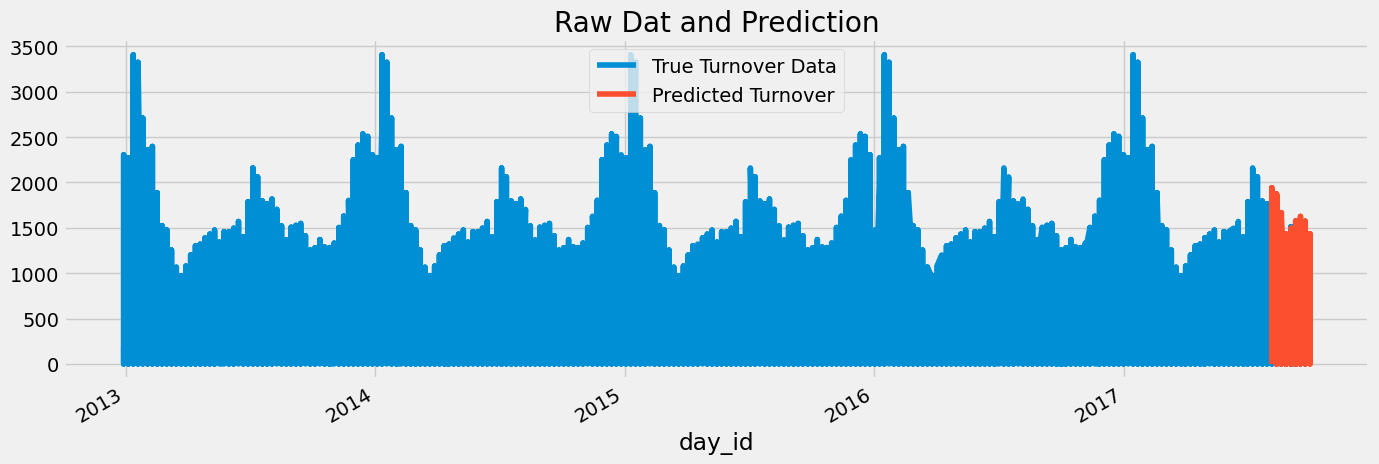

In [8]:
data =  forecasting.data

concat_data = pd.concat([X_val, data], sort=False)

ax = concat_data[['turnover','pred_turnover']].plot(figsize=(15, 5))
plt.legend(['True Turnover Data', 'Predicted Turnover'])
ax.set_title('Raw Dat and Prediction')
plt.show()

- **Zoomer sur une année**

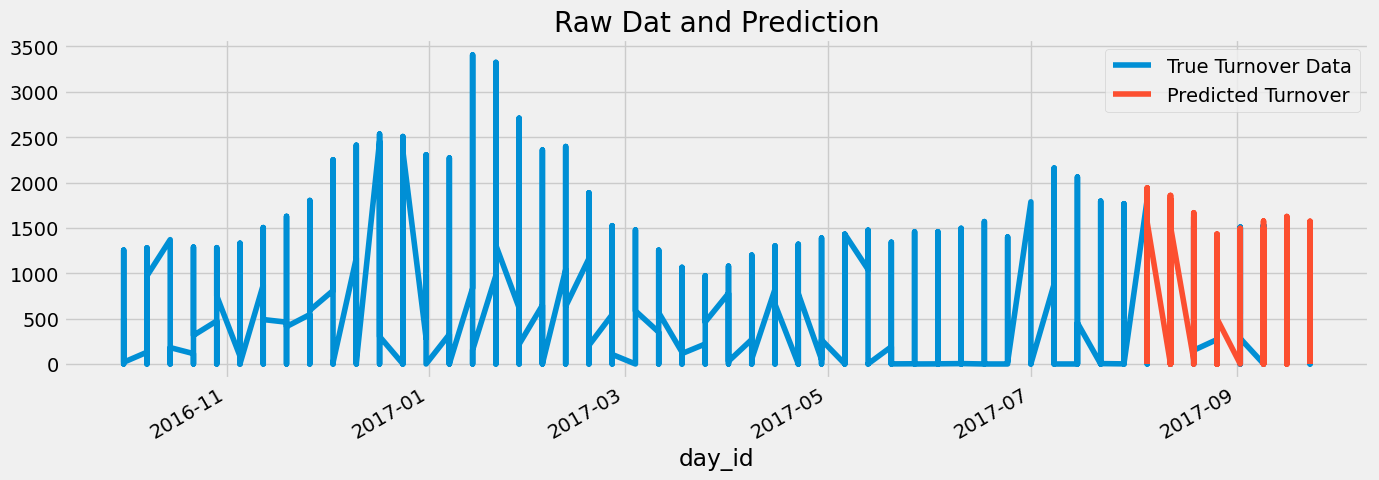

In [9]:
ax = concat_data.loc[(concat_data.index > '2016-09-30') & (concat_data.index < '2017-09-30')][['turnover','pred_turnover']].plot(figsize=(15, 5))
plt.legend(['True Turnover Data', 'Predicted Turnover'])
ax.set_title('Raw Dat and Prediction')
plt.show()

- **Look at the worst and best predicted week**

In [10]:
y_val = forecasting.y_val

X_val['turnover'] = y_val.values

X_val['error'] = np.abs(X_val['pred_turnover'] - X_val['turnover'])
X_val['day_id'] = X_val.index.date

X_val = X_val.reset_index(drop=True)


In [11]:
val = pd.DataFrame()
val[['weekofyear', 'turnover', 'pred_turnover', 'error']] = X_val[['weekofyear', 'turnover', 'pred_turnover', 'error']]

In [12]:
val.groupby(['weekofyear'])['error'].mean().sort_values(ascending=False)

weekofyear
38    88.775036
39    87.307214
35    72.954412
37    66.421209
36    63.338365
34    60.773671
32    57.942034
31    57.378994
33    57.229888
Name: error, dtype: float64

In [13]:
val.shape

(11313, 4)

### Feature Importance

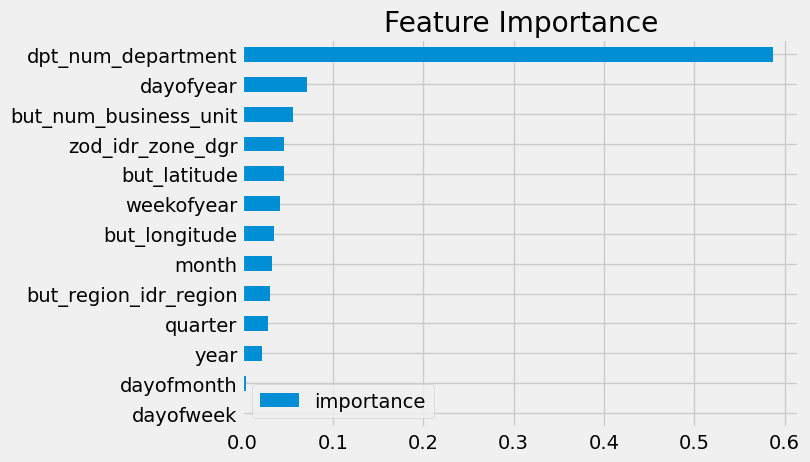

In [14]:
forecasting.get_feature_importance()

## Test Result

In [15]:
test_file_path = 'data/test.csv.gz'
test = forecasting.preprocess_test_data(test_file_path)

In [16]:
test['turnover'] = forecasting.predict(test)
test['day_id'] = test.index

In [17]:
test = test[['day_id', 'but_num_business_unit', 'dpt_num_department', 'turnover']]

In [18]:
test = test.reset_index(drop=True)

In [19]:
test.head()

,day_id,but_num_business_unit,dpt_num_department,turnover
0,2017-10-07,436,88,9.218266
1,2017-10-07,195,73,0.000000
2,2017-10-07,12,117,170.477615
3,2017-10-07,12,88,426.247589
4,2017-10-07,12,73,0.000000


# Chosen Metric: RMSE (Root Mean Square Error)

Root Mean Square Error (RMSE) is a widely used metric for assessing the performance of forecasting models. It quantifies the average magnitude of errors between the predicted and actual values.

The reasons why RMSE is an excellent choice for forecasting turnover include:

- Outlier Sensitivity: Unlike the Mean Absolute Error (MAE), RMSE heavily penalizes large errors, making it valuable for pinpointing instances where substantial deviations occur. RMSE assigns a relatively high weight to large errors because the errors are squared before being averaged, which can be beneficial if large errors are particularly undesirable in our application.
- Unit Consistency: RMSE maintains unit consistency, which can simplify result interpretation. For instance, if we’re predicting turnover in dollars, the RMSE will also be in dollars, making it more intuitive to comprehend.
- Mathematical Interpretability: RMSE is easy to interpret as it represents the square root of the average of the squared differences between the predicted and actual values. This clarity makes it straightforward for stakeholders, such as store managers, to comprehend the performance of the forecasting model.
- Performance Differentiation: RMSE offers a clear gauge of the model’s performance in terms of predicting turnover values. A lower RMSE signifies better accuracy, which is vital for making informed decisions at the department level.


## Next Steps

- Add more features and data (sport events infos, holidays, ...)
- Try different models
- Model Hyper paramaters tuning 
- Model deployment and monitoring  on a server
- Develop dashboards or reports to effectively communicate the forecasts to store managers